In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error


# Mock loading the dataset
df = pd.read_csv("Crude Oil WTI Futures Historical Data.csv")  # replace with your filename
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,07/29/2022,96.75,95.42,99.75,94.59,116.64K,2.22%
1,07/28/2022,94.65,96.09,97.82,94.28,96.14K,-0.67%
2,07/27/2022,95.29,93.51,96.53,92.30,105.40K,2.59%
3,07/26/2022,92.88,93.95,96.60,92.64,89.07K,-1.63%
4,07/25/2022,94.42,92.83,94.62,90.79,92.70K,2.15%


In [28]:


# Assume the structure: Date, Price
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)

# Normalize x-axis: x_j in [0, 1]
df['x'] = np.linspace(0, 1, len(df))

# Rename for clarity
df.rename(columns={'High': 'w_j'}, inplace=True)

def priestley_chao_estimator_normalized(t, z_i, N, d):
    t_i = np.arange(0, N+1) / N  # sample points
    t = np.array(t).reshape(-1, 1)  # ensure column vector

    weights = np.exp(-((t - t_i)**2) / (2 * d**2))
    weights_sum = weights.sum(axis=1, keepdims=True)
    weights /= weights_sum  # normalize

    u_hat = weights @ z_i
    return u_hat.flatten()

# Choose 10 equidistant sample points (i = 0, ..., 10)
N = 10
subset_indices = np.linspace(0, len(df)-1, N+1, dtype=int)
z_i = df.loc[subset_indices, 'w_j'].values
t_values = np.linspace(0, 1, 500)  # Evaluation points

# Estimate
d = 0.0513  # as given
u_hat_vals = priestley_chao_estimator_normalized(t_values, z_i, N, d)



# Interpolate the original data to get ground truth at t_values
interp_func = interp1d(df['x'], df['w_j'], kind='linear', fill_value="extrapolate")
true_vals = interp_func(t_values)

# Compute MSE
mse = mean_squared_error(true_vals, u_hat_vals)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 25.99992261126579


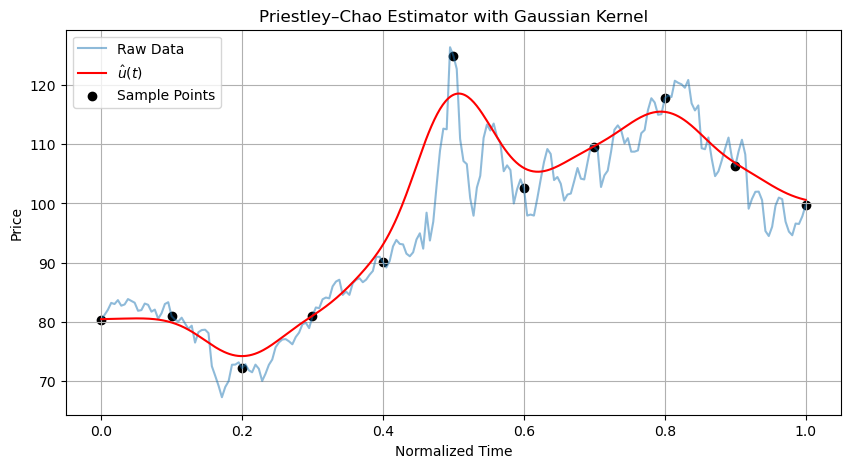

In [29]:

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df['x'], df['w_j'], label='Raw Data', alpha=0.5)
plt.plot(t_values, u_hat_vals, label=r'$\hat{u}(t)$', color='red')
plt.scatter(np.arange(0, N+1)/N, z_i, color='black', label='Sample Points')
plt.title('Priestley–Chao Estimator with Gaussian Kernel')
plt.xlabel('Normalized Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
